Importing the required libraries for EDA

In [204]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
sns.set(style="whitegrid")

Loading the data into the data frame

In [205]:
df = pd.read_csv("heart.csv")
# To display the top 5 rows
df.head(5)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


Overview of the Dataset

In [206]:
df.shape

(8763, 26)

In [207]:
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [208]:
df.dtypes

Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent  

In [209]:
for feature in df.columns:
  print(feature, df[feature].nunique())

Patient ID 8763
Age 73
Sex 2
Cholesterol 281
Blood Pressure 3915
Heart Rate 71
Diabetes 2
Family History 2
Smoking 2
Obesity 2
Alcohol Consumption 2
Exercise Hours Per Week 8763
Diet 3
Previous Heart Problems 2
Medication Use 2
Stress Level 10
Sedentary Hours Per Day 8763
Income 8615
BMI 8763
Triglycerides 771
Physical Activity Days Per Week 8
Sleep Hours Per Day 7
Country 20
Continent 6
Hemisphere 2
Heart Attack Risk 2


In [210]:
df[["Physical Activity Days Per Week","Sleep Hours Per Day","Triglycerides", "Income","Heart Rate","Cholesterol","Age"]]=df[["Physical Activity Days Per Week","Sleep Hours Per Day","Triglycerides", "Income","Heart Rate","Cholesterol","Age"]].astype(float)

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   float64
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   float64
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   float64
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [212]:
# dropping patient id, country, continent, and hemisphere since they have very less effect on stress
df.drop(['Hemisphere','Continent','Country','Patient ID'], axis = 1, inplace=True)

In [213]:
df.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
0,67.0,Male,208.0,158/88,72.0,0,0,1,0,0,...,0,0,9,6.615001,261404.0,31.251233,286.0,0.0,6.0,0
1,21.0,Male,389.0,165/93,98.0,1,1,1,1,1,...,1,0,1,4.963459,285768.0,27.194973,235.0,1.0,7.0,0
2,21.0,Female,324.0,174/99,72.0,1,0,0,0,0,...,1,1,9,9.463426,235282.0,28.176571,587.0,4.0,4.0,0
3,84.0,Male,383.0,163/100,73.0,1,1,1,0,1,...,1,0,9,7.648981,125640.0,36.464704,378.0,3.0,4.0,0
4,66.0,Male,318.0,91/88,93.0,1,1,1,1,0,...,1,0,6,1.514821,160555.0,21.809144,231.0,1.0,5.0,0


In [214]:
df = pd.get_dummies(df, columns=['Sex'])

In [215]:
print(df.head())  # This will show the new columns with encoded values
# df.drop(['Sex_Female','Sex_Male'], axis = 1, inplace=True)
df['Sex_Female'].replace({True: 1, False: 0}, inplace=True)

    Age  Cholesterol Blood Pressure  Heart Rate  Diabetes  Family History  \
0  67.0        208.0         158/88        72.0         0               0   
1  21.0        389.0         165/93        98.0         1               1   
2  21.0        324.0         174/99        72.0         1               0   
3  84.0        383.0        163/100        73.0         1               1   
4  66.0        318.0          91/88        93.0         1               1   

   Smoking  Obesity  Alcohol Consumption  Exercise Hours Per Week  ...  \
0        1        0                    0                 4.168189  ...   
1        1        1                    1                 1.813242  ...   
2        0        0                    0                 2.078353  ...   
3        1        0                    1                 9.828130  ...   
4        1        1                    0                 5.804299  ...   

  Stress Level  Sedentary Hours Per Day    Income        BMI  Triglycerides  \
0            

In [216]:
categorical_features = df.select_dtypes(include=['object'])
categorical_features

,Blood Pressure,Diet
0,158/88,Average
1,165/93,Unhealthy
2,174/99,Healthy
3,163/100,Average
4,91/88,Unhealthy
...,...,...
8758,94/76,Healthy
8759,157/102,Healthy
8760,161/75,Average
8761,119/67,Unhealthy


In [217]:
# Split the blood pressure values into two columns (systolic and diastolic)
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)

# Convert systolic and diastolic values to integers
df['Systolic'] = pd.to_numeric(df['Systolic'])
df['Diastolic'] = pd.to_numeric(df['Diastolic'])

# Drop the original 'Blood Pressure' column
df.drop('Blood Pressure', axis=1, inplace=True)

In [218]:
df.head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Sex_Female,Sex_Male,Systolic,Diastolic
0,67.0,208.0,72.0,0,0,1,0,0,4.168189,Average,...,261404.0,31.251233,286.0,0.0,6.0,0,0,True,158,88
1,21.0,389.0,98.0,1,1,1,1,1,1.813242,Unhealthy,...,285768.0,27.194973,235.0,1.0,7.0,0,0,True,165,93
2,21.0,324.0,72.0,1,0,0,0,0,2.078353,Healthy,...,235282.0,28.176571,587.0,4.0,4.0,0,1,False,174,99
3,84.0,383.0,73.0,1,1,1,0,1,9.828130,Average,...,125640.0,36.464704,378.0,3.0,4.0,0,0,True,163,100
4,66.0,318.0,93.0,1,1,1,1,0,5.804299,Unhealthy,...,160555.0,21.809144,231.0,1.0,5.0,0,0,True,91,88


In [219]:
df.Diet.unique()

array(['Average', 'Unhealthy', 'Healthy'], dtype=object)

In [220]:
# Define the desired order for the 'Diet' categories
categories = ['Unhealthy', 'Average', 'Healthy']

# Label encoding for the 'Diet' column using the custom order
df['Diet_encoded'] = pd.Categorical(df['Diet'], categories=categories).codes

# Print the first few rows to see the encoded values based on your order
print(df[['Diet', 'Diet_encoded']].head())

        Diet  Diet_encoded
0    Average             1
1  Unhealthy             0
2    Healthy             2
3    Average             1
4  Unhealthy             0


In [221]:
df.drop(['Diet'], axis = 1, inplace=True)
df.head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Sex_Female,Sex_Male,Systolic,Diastolic,Diet_encoded
0,67.0,208.0,72.0,0,0,1,0,0,4.168189,0,...,31.251233,286.0,0.0,6.0,0,0,True,158,88,1
1,21.0,389.0,98.0,1,1,1,1,1,1.813242,1,...,27.194973,235.0,1.0,7.0,0,0,True,165,93,0
2,21.0,324.0,72.0,1,0,0,0,0,2.078353,1,...,28.176571,587.0,4.0,4.0,0,1,False,174,99,2
3,84.0,383.0,73.0,1,1,1,0,1,9.828130,1,...,36.464704,378.0,3.0,4.0,0,0,True,163,100,1
4,66.0,318.0,93.0,1,1,1,1,0,5.804299,1,...,21.809144,231.0,1.0,5.0,0,0,True,91,88,0


In [222]:
df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Sex_Female,Systolic,Diastolic,Diet_encoded
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,...,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211,0.302636,135.075659,85.156111,1.007874
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,...,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502,0.459425,26.349976,14.676565,0.817134
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,...,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000,0.000000,90.000000,60.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,...,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000,0.000000,112.000000,72.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,...,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000,0.000000,135.000000,85.000000,1.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,...,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000,1.000000,158.000000,98.000000,2.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,...,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000,1.000000,180.000000,110.000000,2.000000


In [223]:
df.shape

(8763, 24)

In [224]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 24)


In [225]:
# No duplicate rows

In [226]:
df.isnull().sum()

Age                                0
Cholesterol                        0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Heart Attack Risk                  0
Sex_Female                         0
Sex_Male                           0
Systolic                           0
Diastolic                          0
Diet_encoded                       0
dtype: int64

In [227]:
# No null values

In [228]:
#assert that there are no missing values in the dataframe

assert pd.notnull(df).all().all()

Analysis

In [229]:
for feature in df.columns:
  print(feature, df[feature].unique())

Age [67. 21. 84. 66. 54. 90. 20. 43. 73. 71. 77. 60. 88. 69. 38. 50. 45. 36.
 48. 40. 79. 63. 27. 25. 86. 42. 52. 29. 30. 47. 44. 33. 51. 70. 85. 31.
 56. 24. 74. 72. 55. 26. 53. 46. 57. 22. 35. 39. 80. 65. 83. 82. 28. 19.
 75. 18. 34. 37. 89. 32. 49. 23. 59. 62. 64. 61. 76. 41. 87. 81. 58. 78.
 68.]
Cholesterol [208. 389. 324. 383. 318. 297. 358. 220. 145. 248. 373. 374. 228. 259.
 122. 379. 166. 303. 340. 294. 359. 202. 133. 159. 271. 273. 328. 154.
 135. 197. 321. 375. 360. 263. 201. 347. 129. 229. 251. 121. 190. 185.
 279. 336. 192. 180. 203. 368. 222. 243. 218. 120. 285. 377. 369. 311.
 139. 266. 153. 339. 329. 333. 398. 124. 183. 163. 362. 390. 200. 396.
 255. 209. 247. 250. 227. 246. 223. 330. 195. 194. 178. 155. 240. 237.
 216. 276. 224. 326. 198. 301. 314. 304. 334. 213. 254. 230. 316. 277.
 388. 206. 384. 205. 261. 308. 338. 382. 291. 168. 171. 378. 253. 245.
 226. 281. 123. 173. 231. 234. 268. 306. 186. 293. 161. 380. 239. 149.
 320. 219. 335. 265. 126. 307. 270. 225. 193. 1

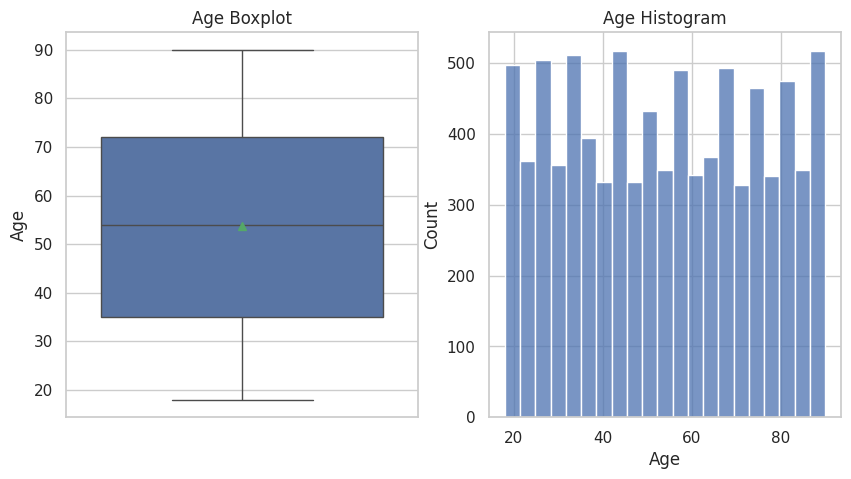

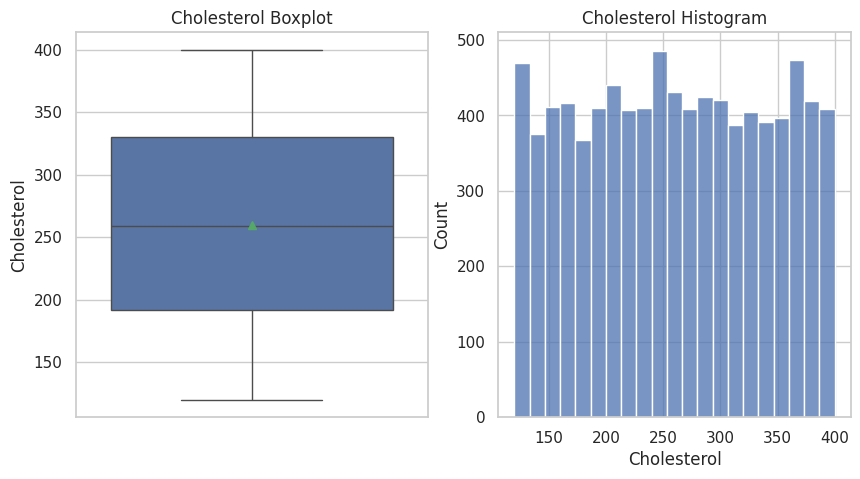

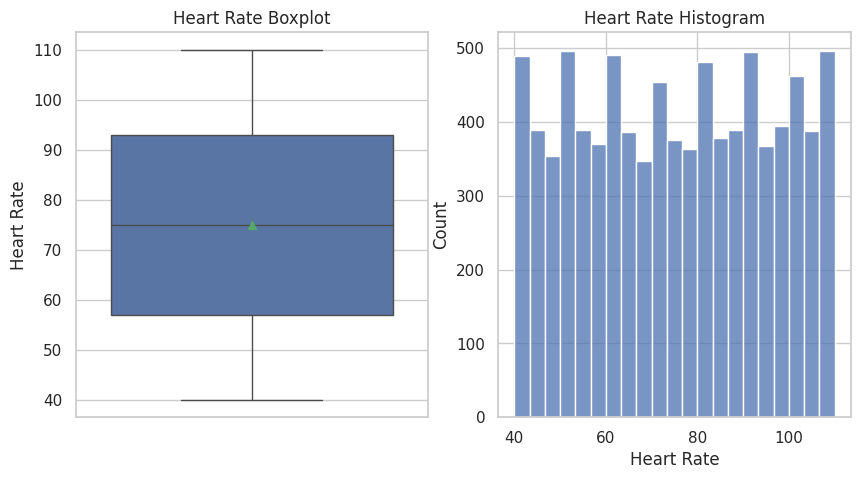

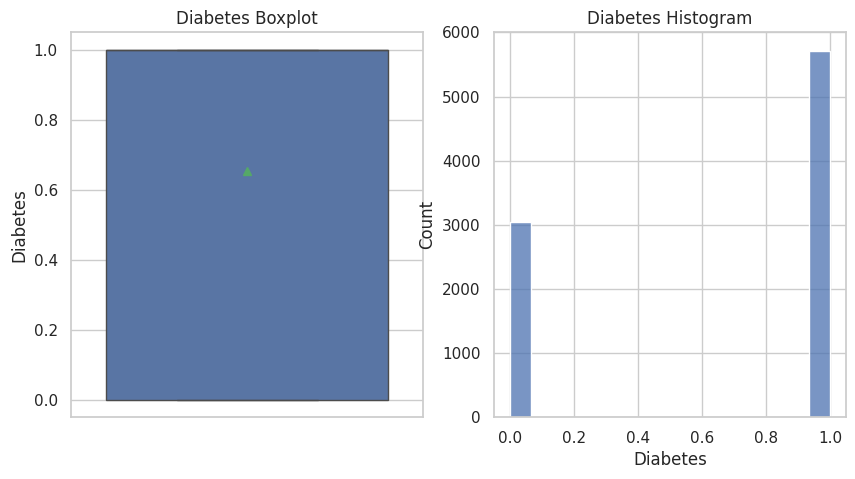

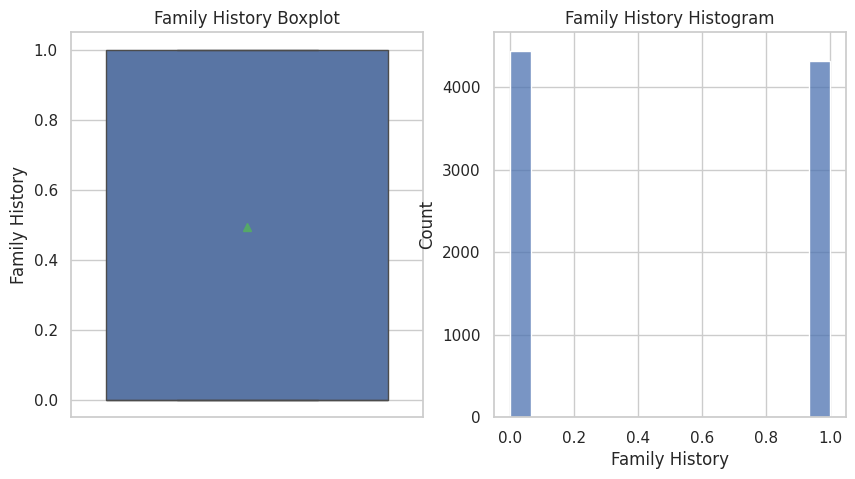

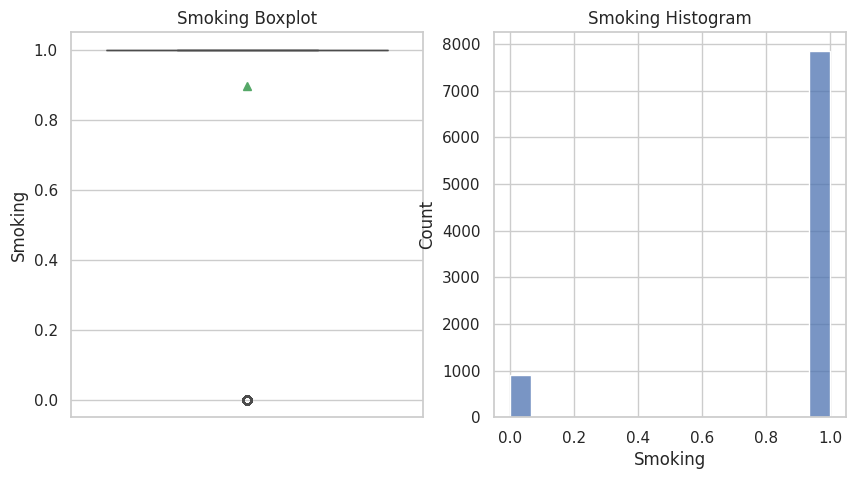

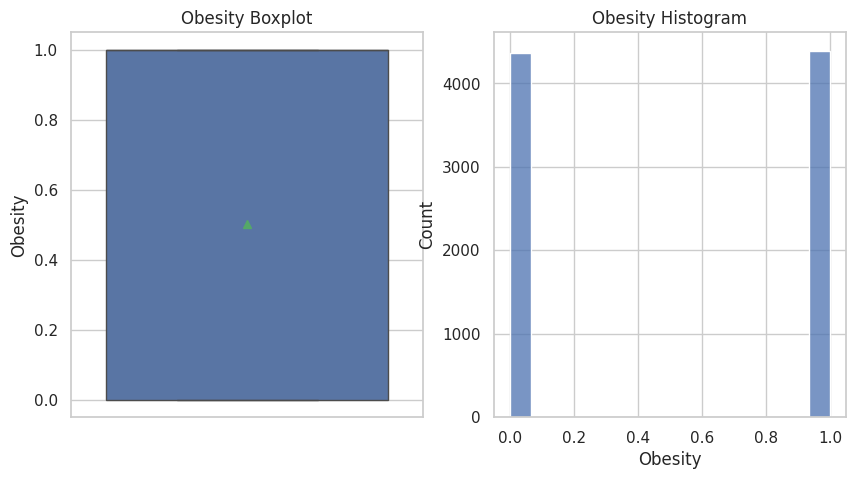

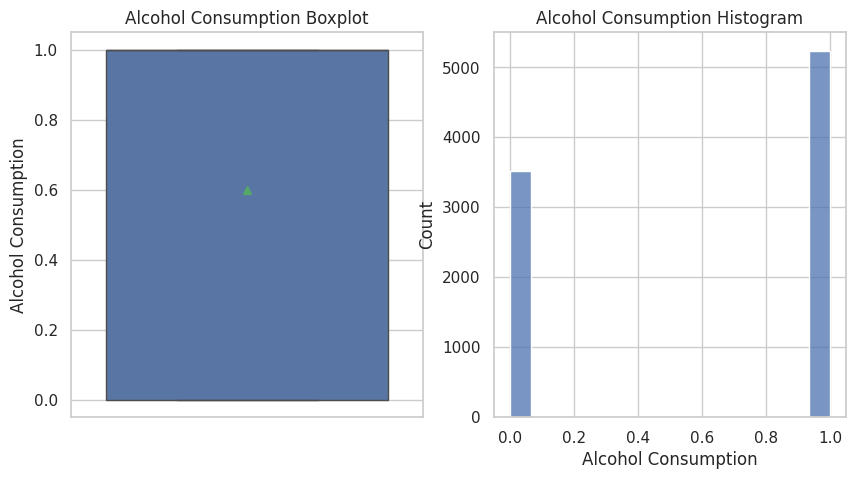

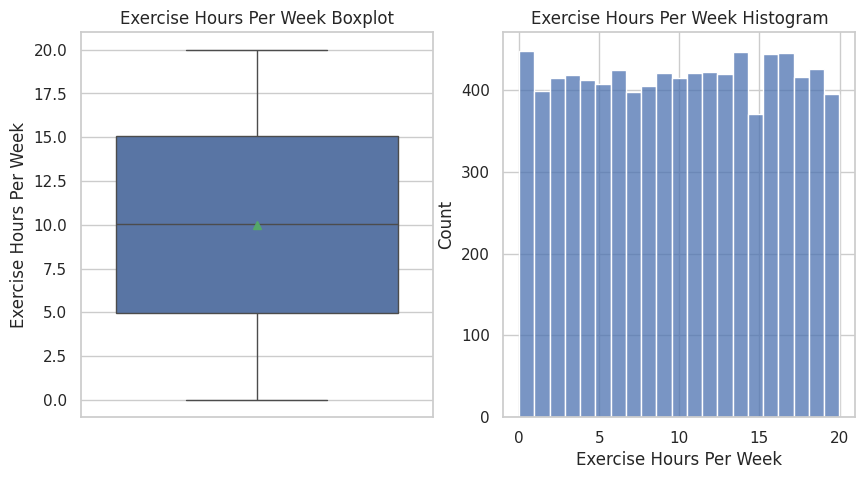

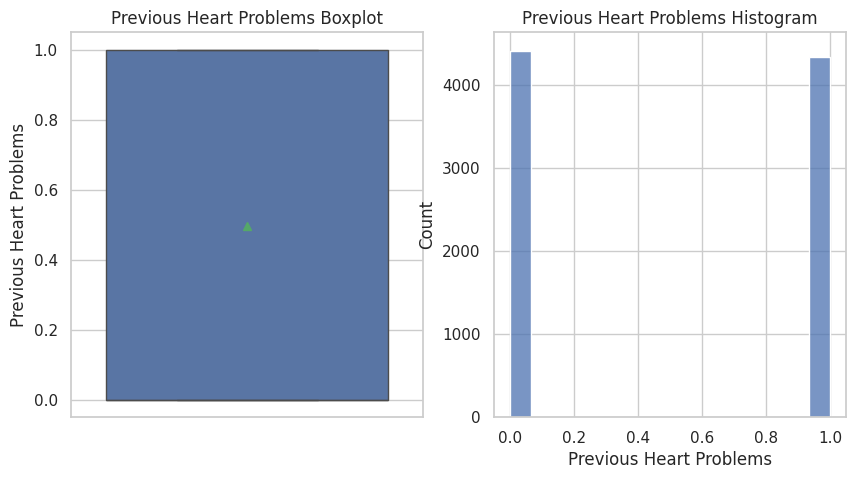

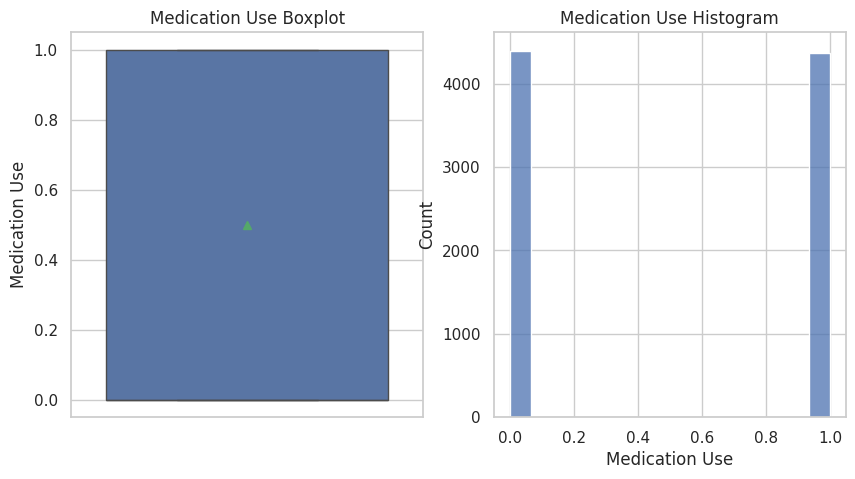

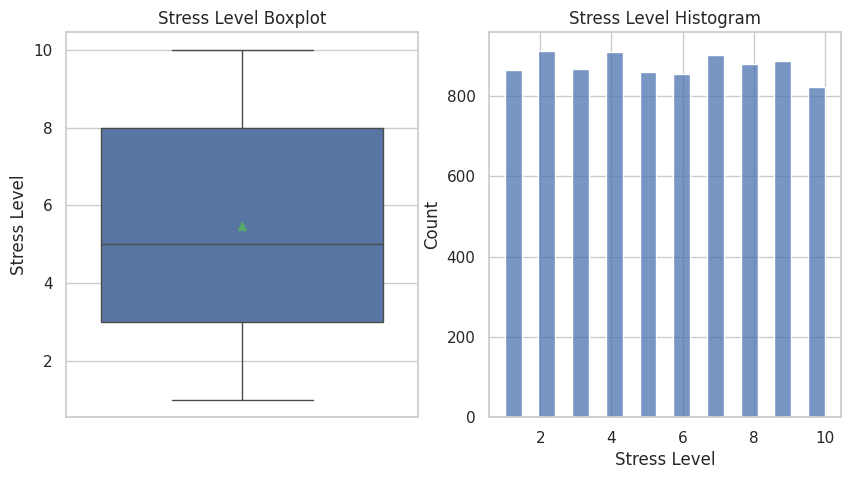

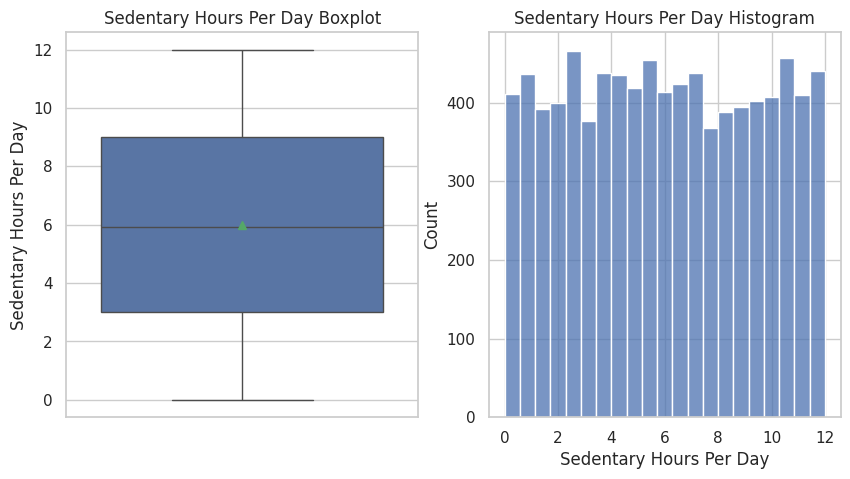

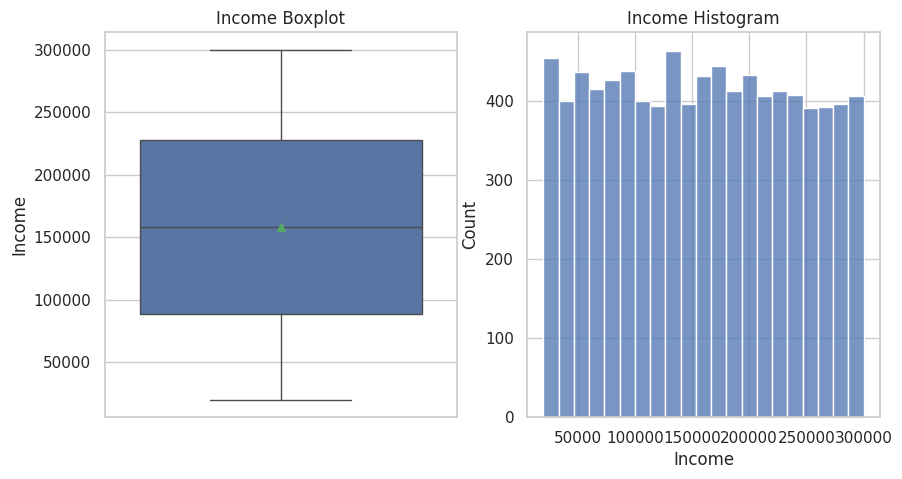

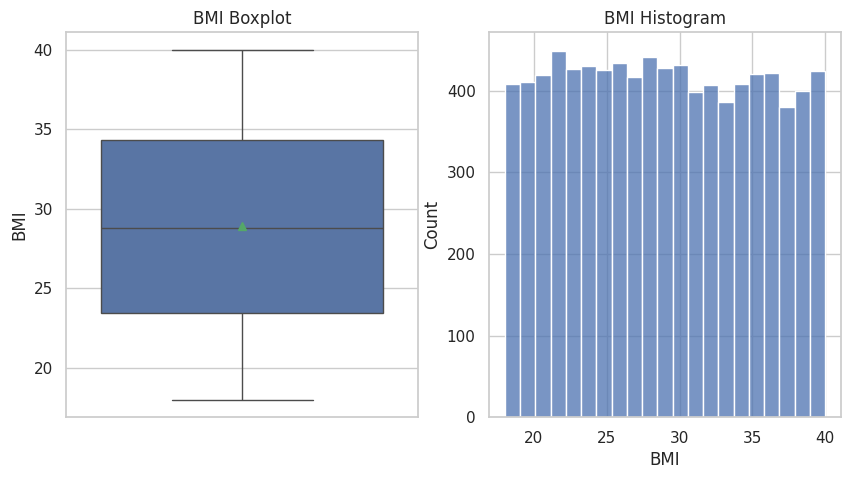

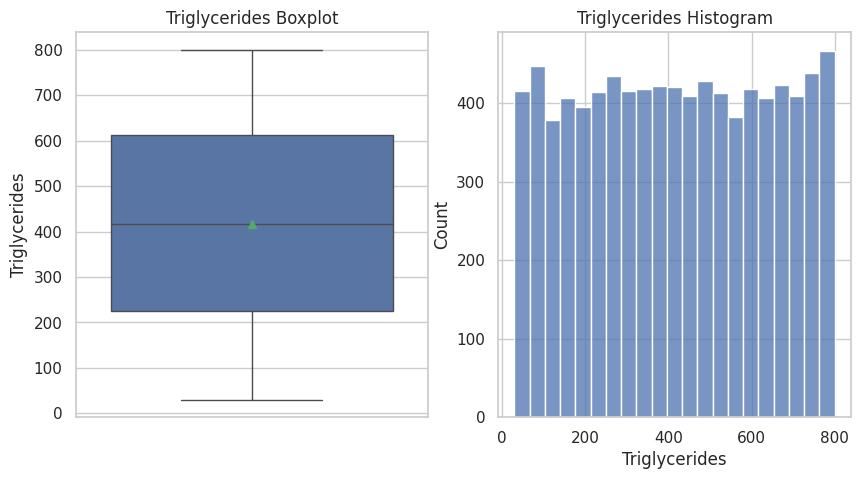

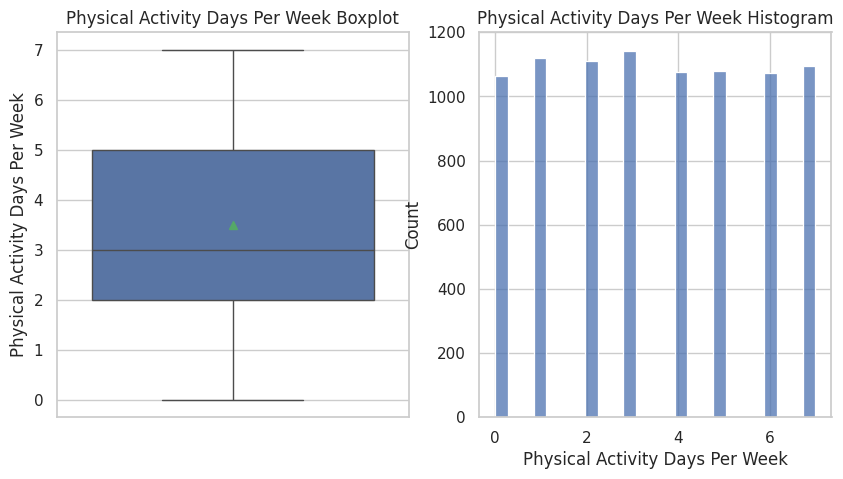

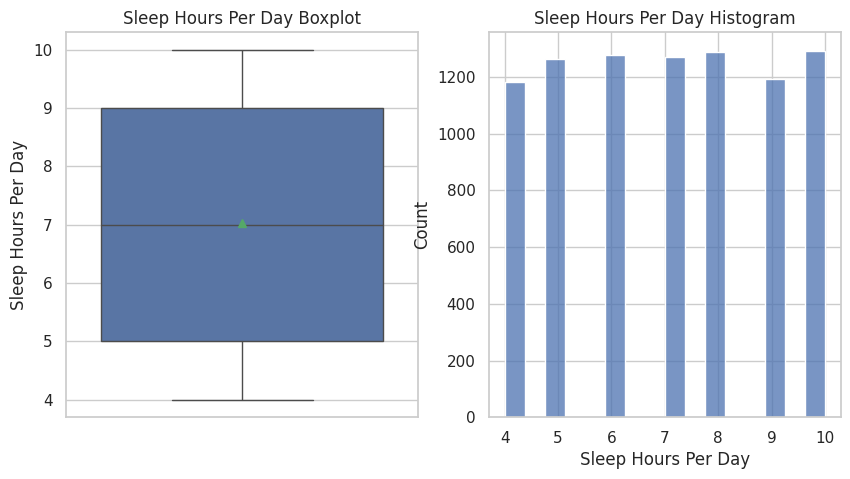

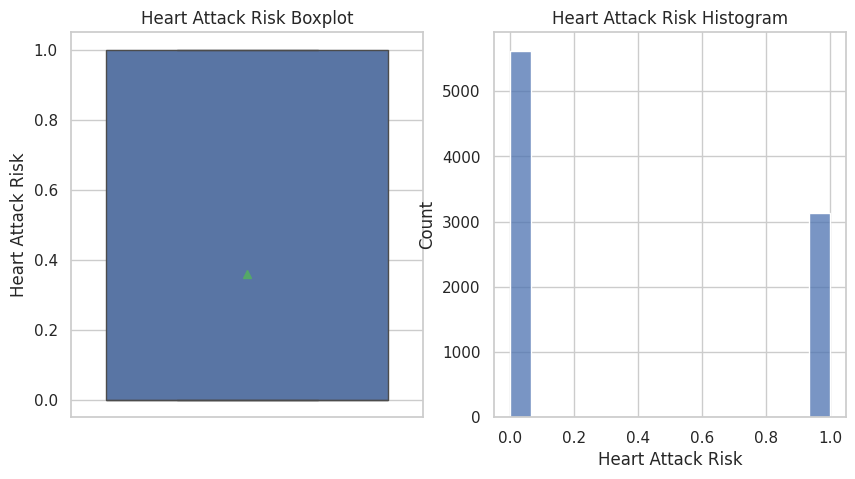

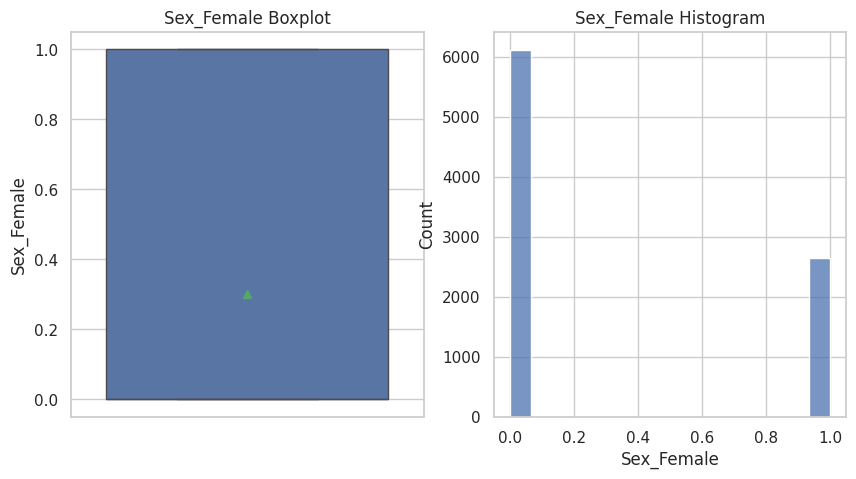

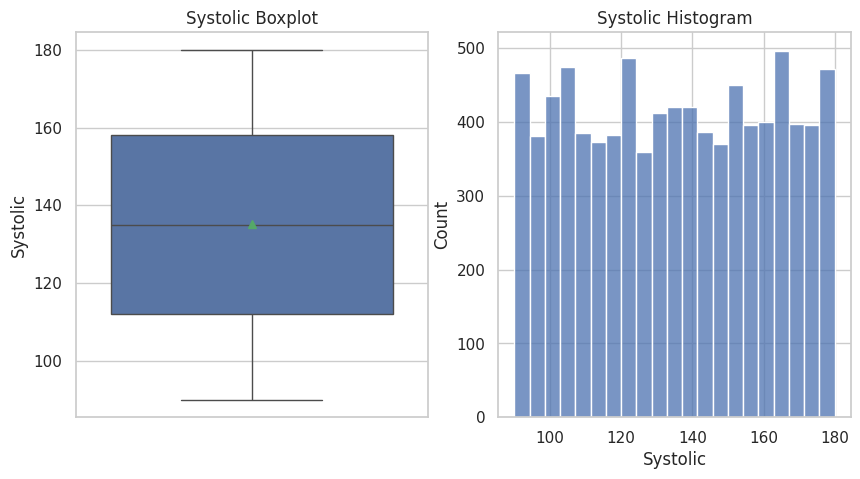

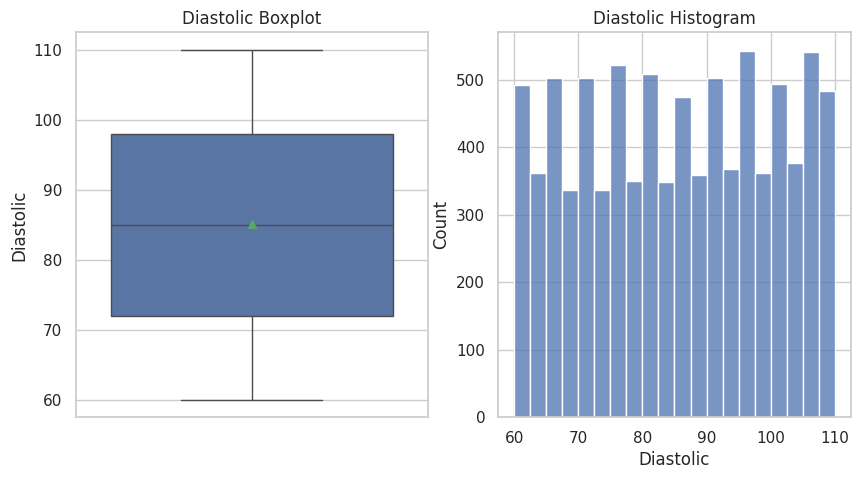

In [230]:
numerical_features = df.select_dtypes(include=['int64','float64'])
for feature in numerical_features:
  fig, (box, hist) = plt.subplots(1, 2, figsize=(10, 5))
  #boxplot on the first subplot
  sns.boxplot(ax=box, data=df[feature], showmeans=True)
  box.set_title(feature+" Boxplot")
  #histogram on the second subplot
  sns.histplot(ax=hist, data=df[feature])
  hist.set_title(feature+" Histogram")

  plt.show()

In [231]:
# No outliers present in the data

In [232]:
from scipy.stats import chi2_contingency

# Iterate over all numerical columns (excluding the target)
for feature in df.columns:  # Select numerical columns
    # Create a contingency table for the chi-square test
    contingency_table = pd.crosstab(df[feature], df['Stress Level'])

    # Perform chi-square test
    chi2, pval, degrees_of_freedom, expected_freq = chi2_contingency(contingency_table.values)

    # Print the results for each feature
    print(f"Feature: {feature}")
    print(f"Chi-Square: {chi2:.4f}, p-value: {pval:.4f}")

print(f"Degrees of freedom: {degrees_of_freedom}")

Feature: Age
Chi-Square: 664.6431, p-value: 0.3167
Feature: Cholesterol
Chi-Square: 2470.3062, p-value: 0.7565
Feature: Heart Rate
Chi-Square: 627.0402, p-value: 0.5258
Feature: Diabetes
Chi-Square: 6.4730, p-value: 0.6918
Feature: Family History
Chi-Square: 11.5235, p-value: 0.2415
Feature: Smoking
Chi-Square: 4.0893, p-value: 0.9054
Feature: Obesity
Chi-Square: 15.0359, p-value: 0.0900
Feature: Alcohol Consumption
Chi-Square: 7.3333, p-value: 0.6025
Feature: Exercise Hours Per Week
Chi-Square: 78867.0000, p-value: 0.4903
Feature: Previous Heart Problems
Chi-Square: 3.4090, p-value: 0.9459
Feature: Medication Use
Chi-Square: 22.2980, p-value: 0.0080
Feature: Stress Level
Chi-Square: 78867.0000, p-value: 0.0000
Feature: Sedentary Hours Per Day
Chi-Square: 78867.0000, p-value: 0.4903
Feature: Income
Chi-Square: 77540.6063, p-value: 0.4845
Feature: BMI
Chi-Square: 78867.0000, p-value: 0.4903
Feature: Triglycerides
Chi-Square: 6894.6806, p-value: 0.6159
Feature: Physical Activity Days Per

**Medication Use** (p-value: 0.0080)
**Obesity** (p-value: 0.0900)
are features which affect Stress Level

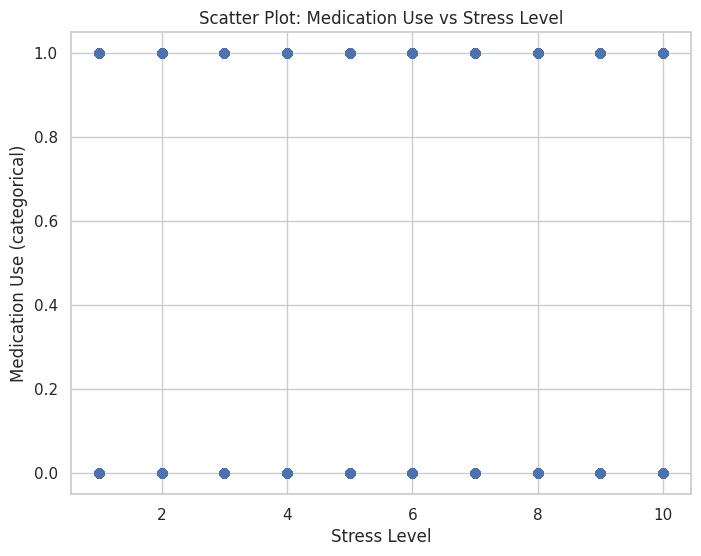

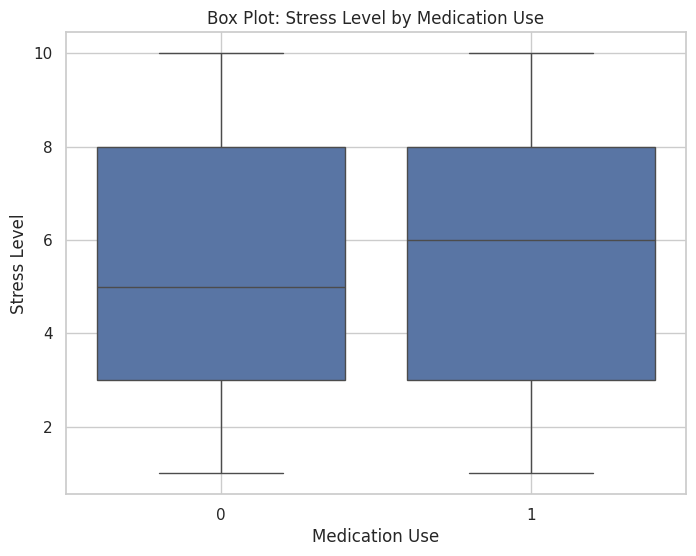

In [233]:
medication_use_col = 'Medication Use'
stress_level_col = 'Stress Level'

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df[stress_level_col], df[medication_use_col], alpha=0.7)
plt.xlabel('Stress Level')
plt.ylabel('Medication Use (categorical)')
plt.title('Scatter Plot: Medication Use vs Stress Level')
plt.grid(True)
plt.show()

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=medication_use_col,y=stress_level_col, data = df )
plt.xlabel('Medication Use')
plt.ylabel('Stress Level')
plt.title('Box Plot: Stress Level by Medication Use')
plt.grid(True)
plt.show()

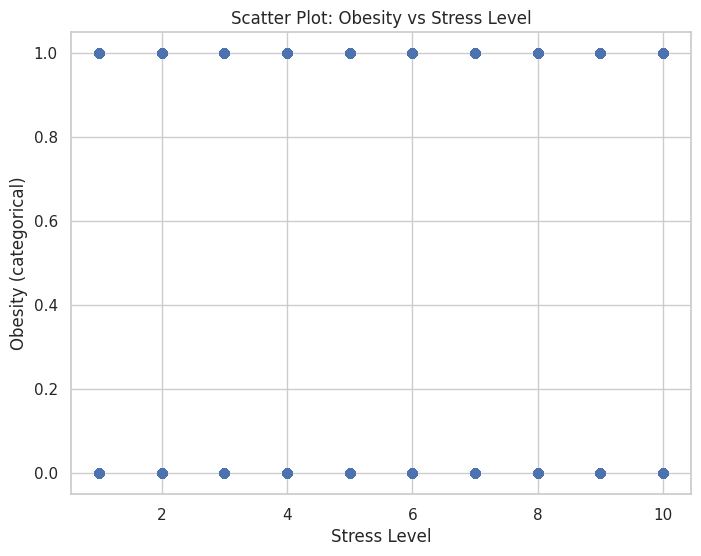

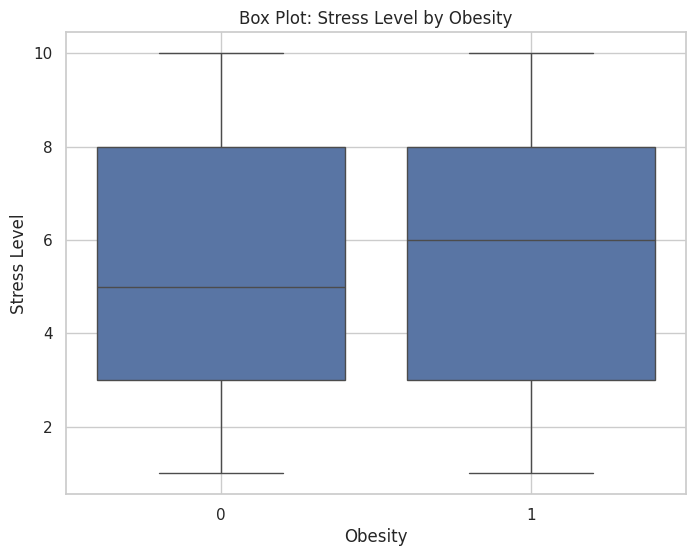

In [234]:
obs_use_col = 'Obesity'
stress_level_col = 'Stress Level'

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df[stress_level_col], df[obs_use_col], alpha=0.7)
plt.xlabel('Stress Level')
plt.ylabel('Obesity (categorical)')
plt.title('Scatter Plot: Obesity vs Stress Level')
plt.grid(True)
plt.show()

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=obs_use_col,y=stress_level_col, data = df )
plt.xlabel('Obesity')
plt.ylabel('Stress Level')
plt.title('Box Plot: Stress Level by Obesity')
plt.grid(True)
plt.show()

In [235]:
categorical_features = []
for feature in df.columns:
  if(df[feature].nunique() <= 3):
    categorical_features.append(feature)
    print(feature, df[feature].unique())
categorical_features.append('Physical Activity Days Per Week')
categorical_features.append('Sleep Hours Per Day')
categorical_features
#Physical Activity Days Per Week [0. 1. 4. 3. 5. 6. 7. 2.]
#Sleep Hours Per Day [ 6.  7.  4.  5. 10.  8.  9.]

Diabetes [0 1]
Family History [0 1]
Smoking [1 0]
Obesity [0 1]
Alcohol Consumption [0 1]
Previous Heart Problems [0 1]
Medication Use [0 1]
Heart Attack Risk [0 1]
Sex_Female [0 1]
Sex_Male [ True False]
Diet_encoded [1 0 2]


['Diabetes',
 'Family History',
 'Smoking',
 'Obesity',
 'Alcohol Consumption',
 'Previous Heart Problems',
 'Medication Use',
 'Heart Attack Risk',
 'Sex_Female',
 'Sex_Male',
 'Diet_encoded',
 'Physical Activity Days Per Week',
 'Sleep Hours Per Day']

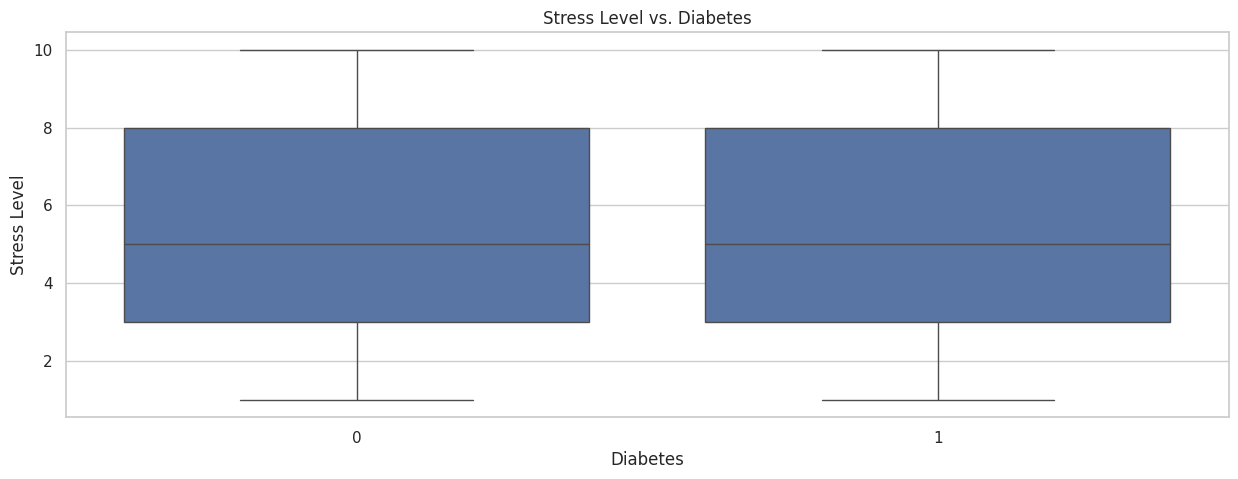

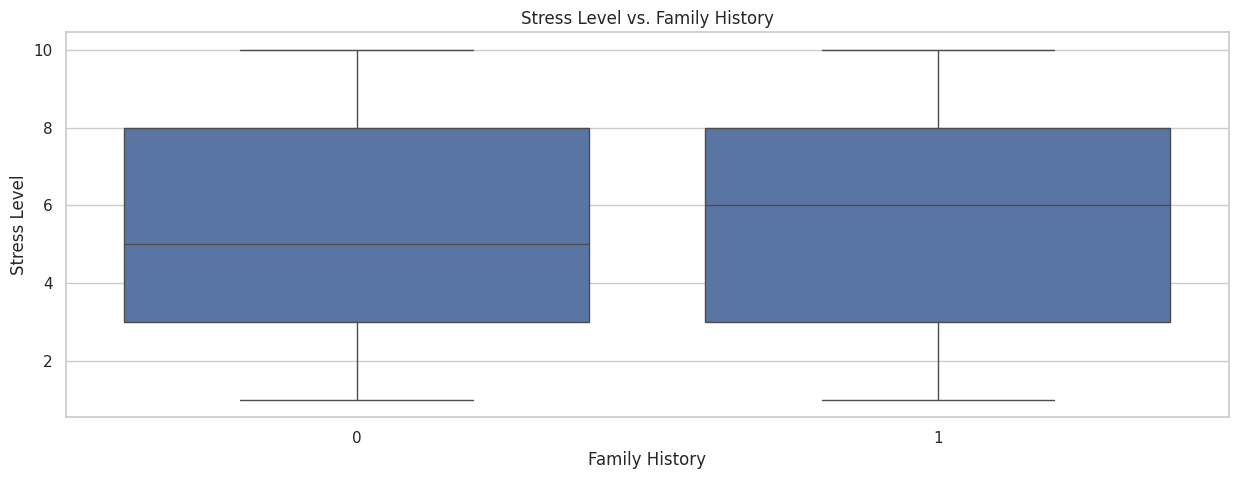

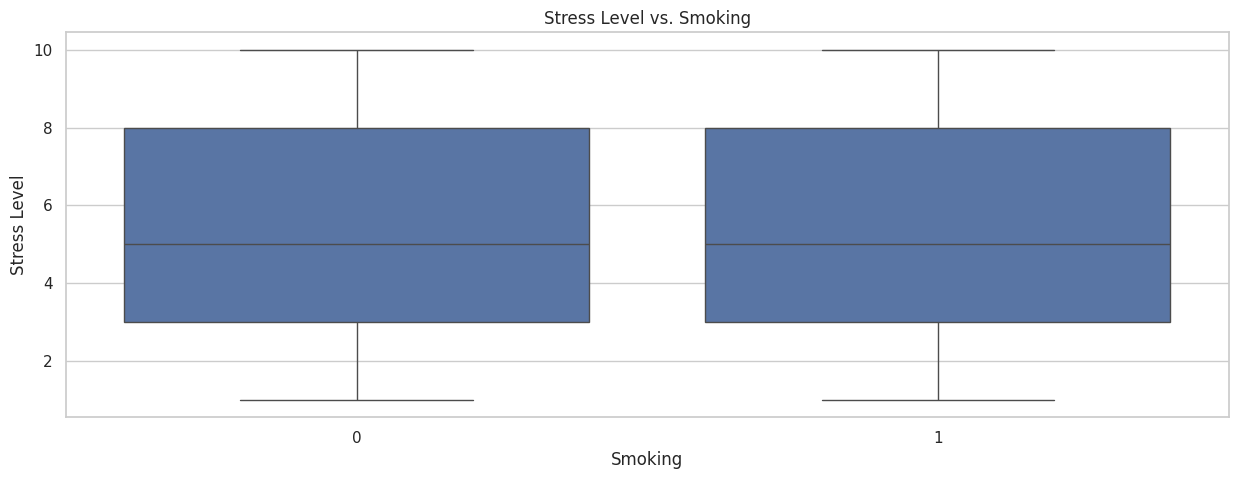

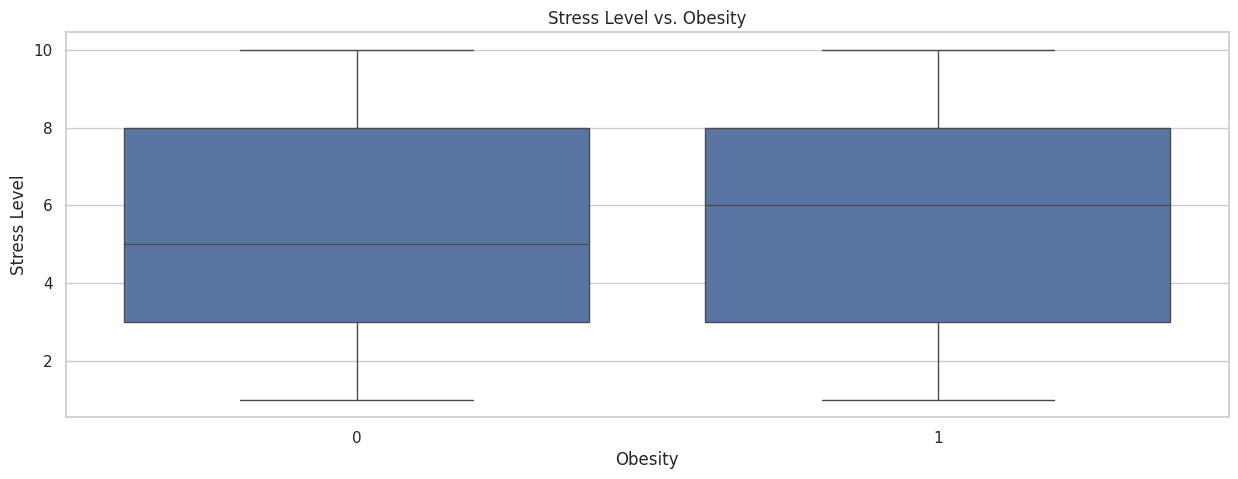

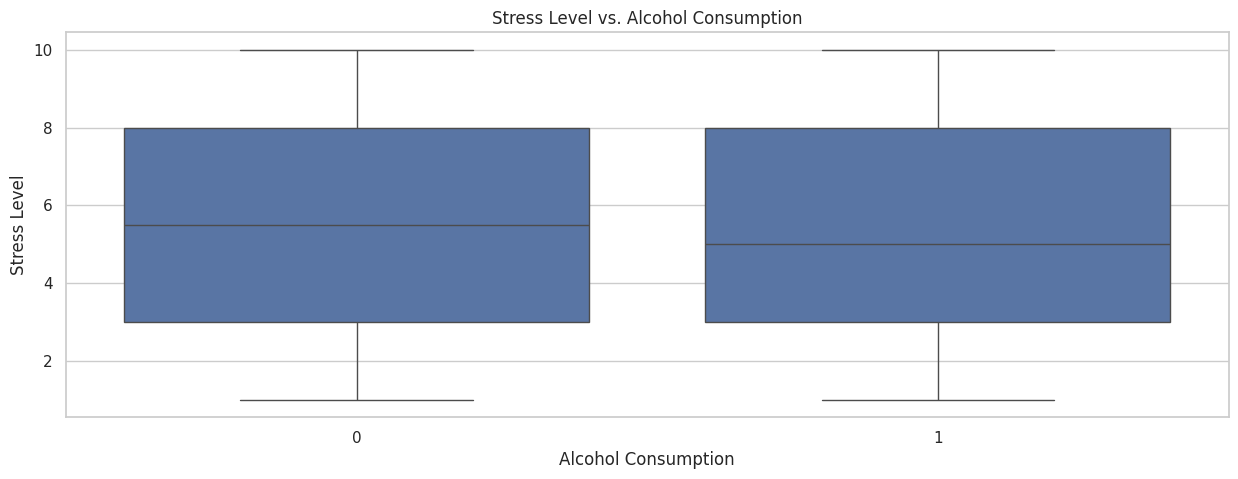

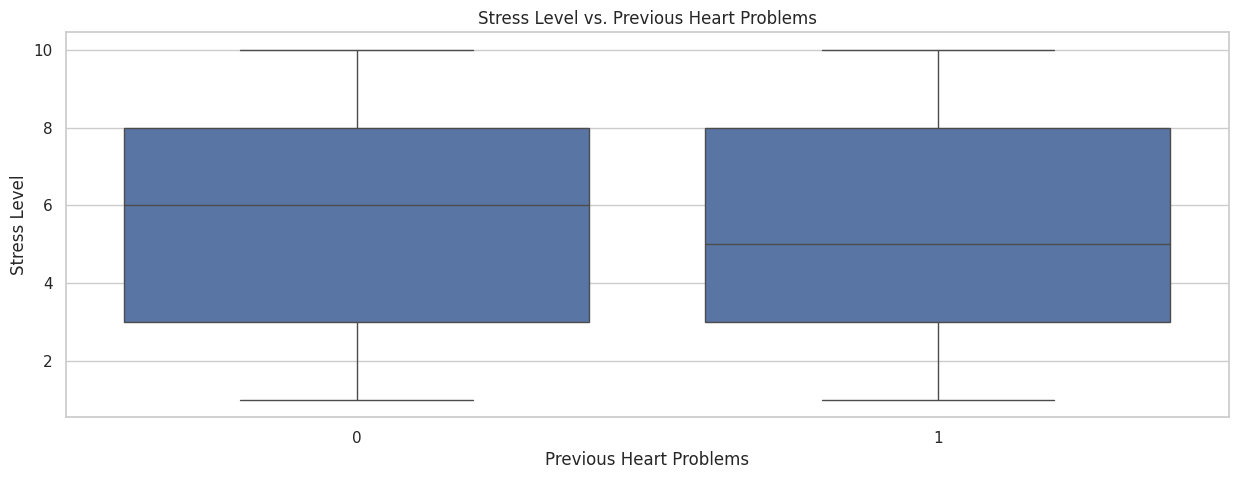

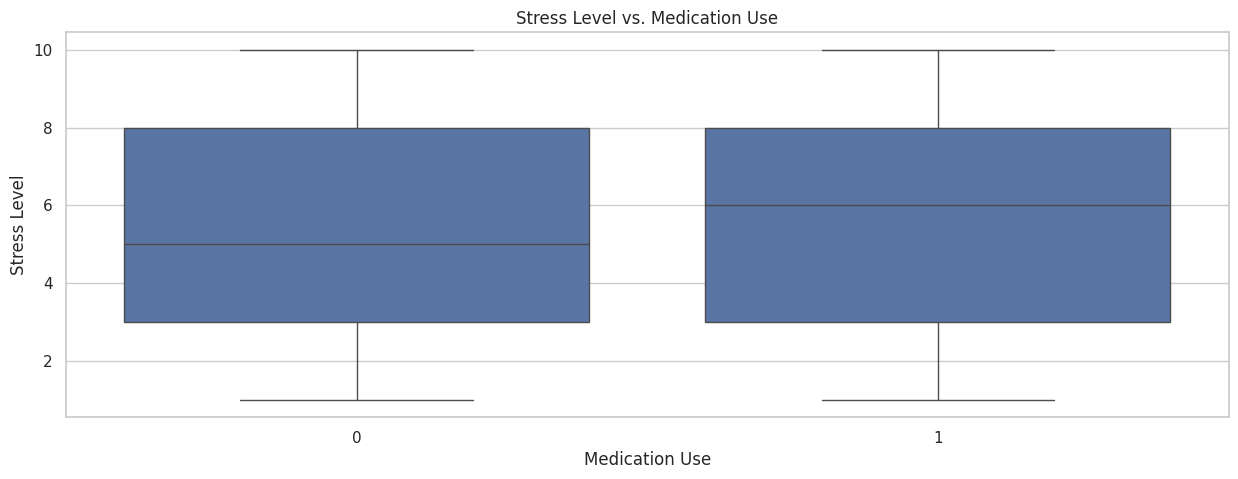

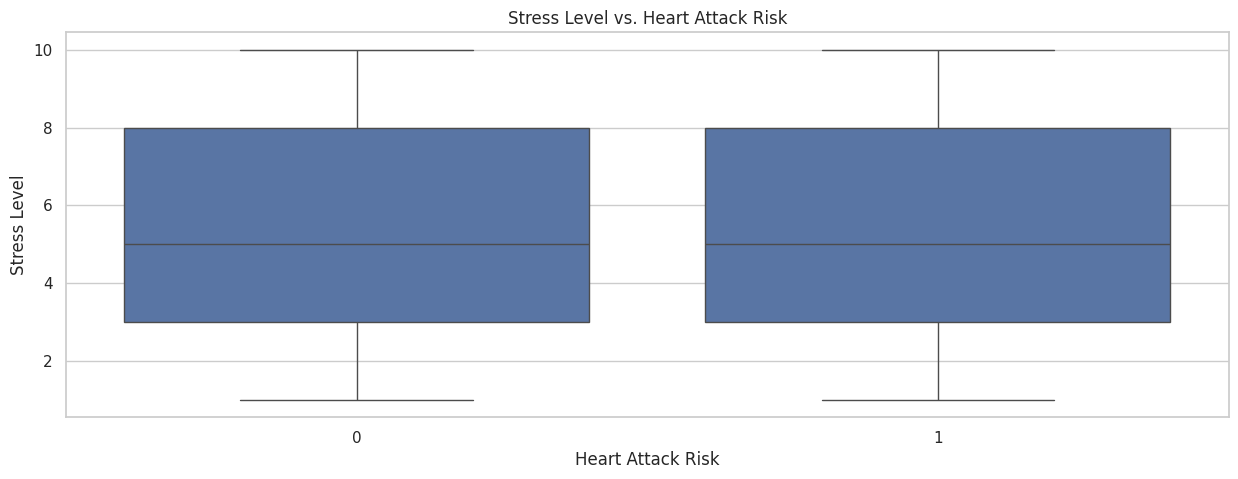

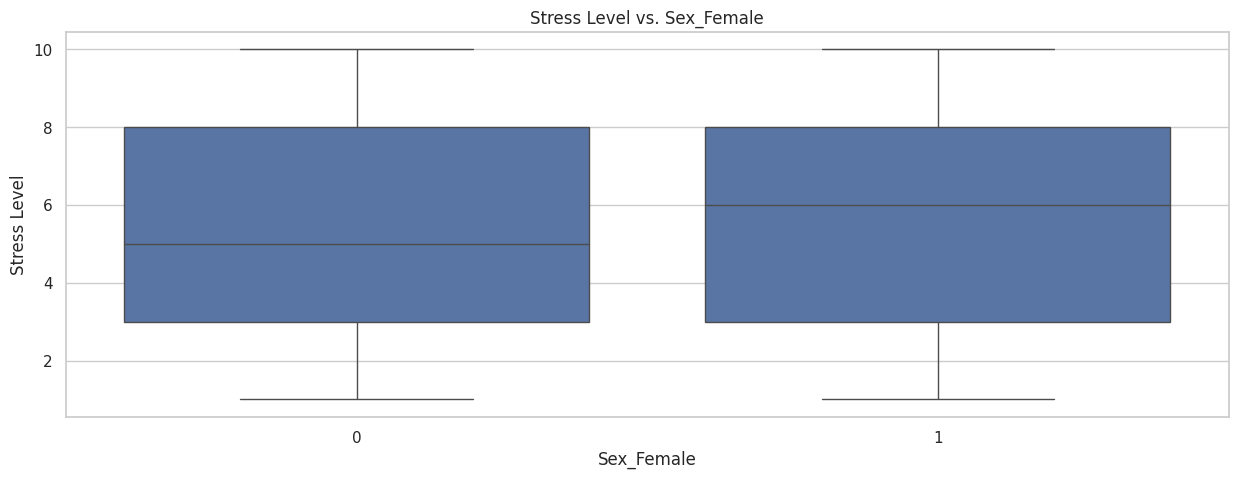

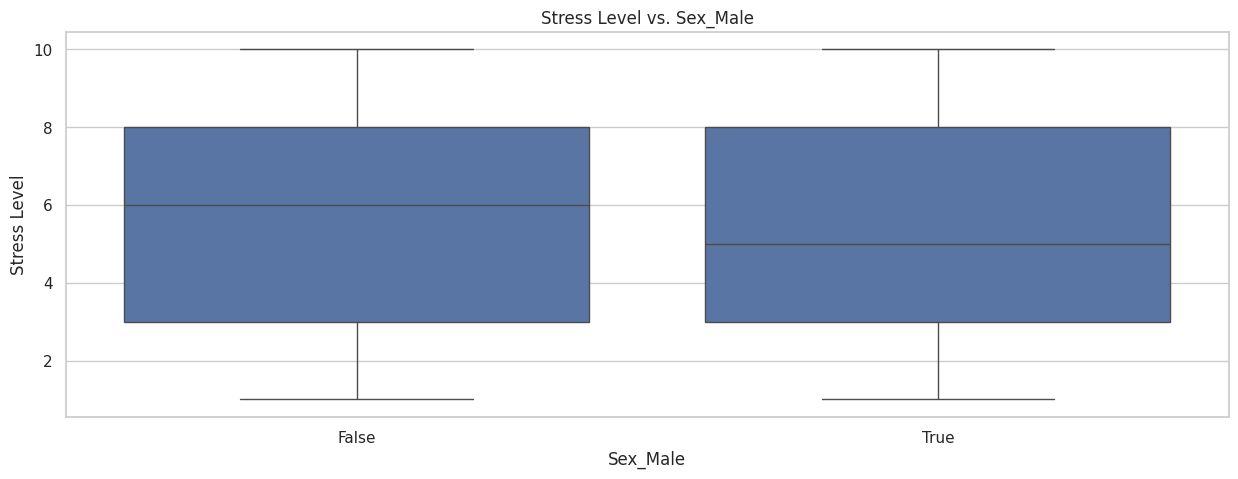

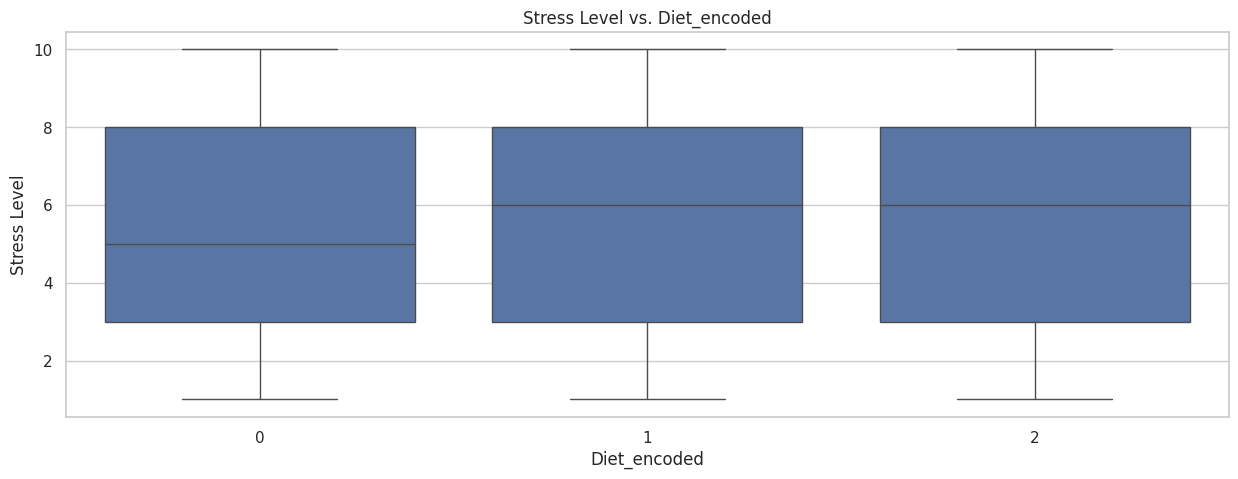

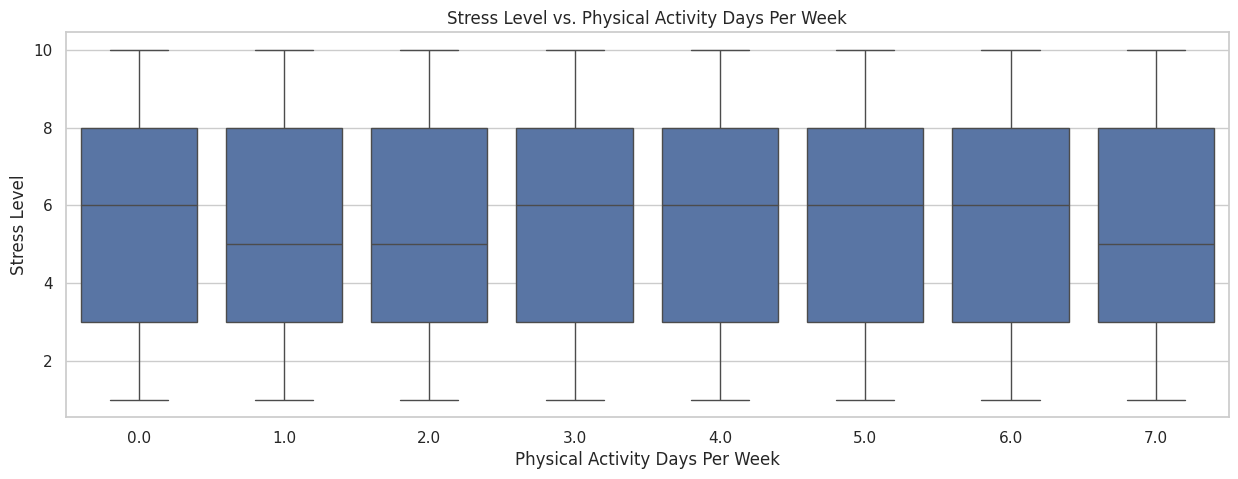

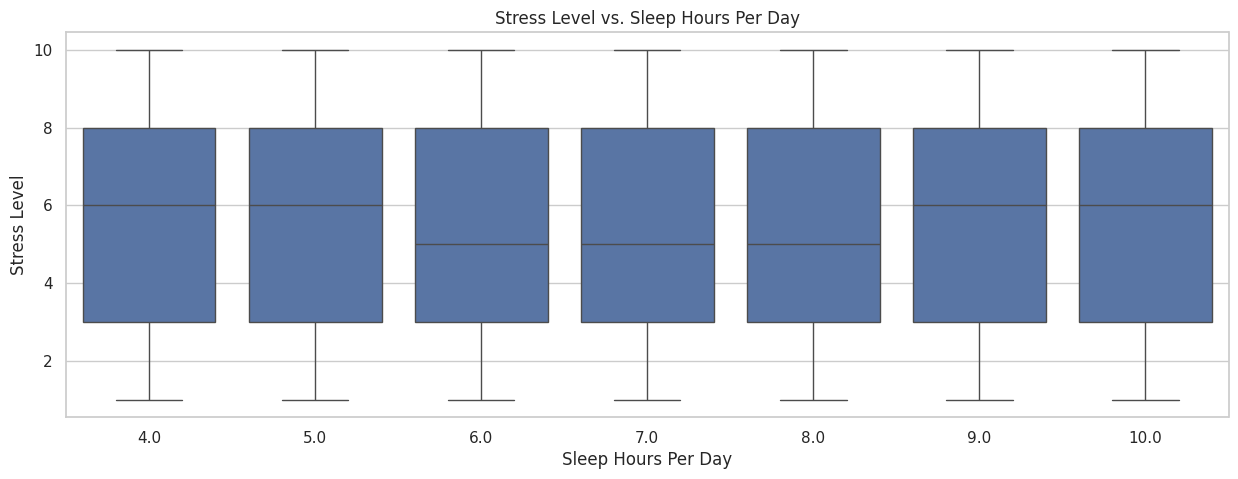

In [236]:
for feature in categorical_features:
  fig = plt.figure(figsize=(15,5))
  sns.boxplot(x = feature, y= 'Stress Level', data=df)
  plt.xlabel(feature)
  plt.ylabel("Stress Level")
  plt.title("Stress Level vs. "+feature)
plt.show()

Family History, Obesity, Previous Heart Problems, Diet_Encoded, Sex_Female, Sex_Male affect Stress Level

In [237]:
numerical_features = []
for feature in df.columns:
  if(df[feature].nunique() > 4):
    numerical_features.append(feature)
numerical_features

['Age',
 'Cholesterol',
 'Heart Rate',
 'Exercise Hours Per Week',
 'Stress Level',
 'Sedentary Hours Per Day',
 'Income',
 'BMI',
 'Triglycerides',
 'Physical Activity Days Per Week',
 'Sleep Hours Per Day',
 'Systolic',
 'Diastolic']

In [238]:
correlation = df[numerical_features].corr()

In [239]:
correlation['Stress Level'].sort_values(ascending=False)

Stress Level                       1.000000
Age                                0.018307
Systolic                           0.017848
Physical Activity Days Per Week    0.007405
Income                            -0.002760
BMI                               -0.003250
Triglycerides                     -0.003921
Heart Rate                        -0.004547
Sedentary Hours Per Day           -0.005397
Diastolic                         -0.008445
Exercise Hours Per Week           -0.009102
Sleep Hours Per Day               -0.014205
Cholesterol                       -0.024487
Name: Stress Level, dtype: float64

Cholesterol has weak negative correlation with Stress Level

In [240]:
from scipy.stats import f_oneway
y=df['Stress Level']
# Perform ANOVA for each numerical feature
for feature in numerical_features:
    # Get the numerical feature values for each category of the target variable
    category_groups = [df[feature][y == category] for category in y.unique()]

    # Perform ANOVA
    f_statistic, p_value = f_oneway(*category_groups)

    # Print results
    print(f'ANOVA results for {feature}:')
    print(f'F-statistic: {f_statistic}')
    print(f'p-value: {p_value}')
    if p_value < 0.05:
        print('The p-value is less than 0.05, suggesting significant differences in means across categories.')
    else:
        print('The p-value is greater than or equal to 0.05, suggesting no significant differences in means across categories.')
    print('-' * 50)


ANOVA results for Age:
F-statistic: 0.84108119148087
p-value: 0.5780441391837665
The p-value is greater than or equal to 0.05, suggesting no significant differences in means across categories.
--------------------------------------------------
ANOVA results for Cholesterol:
F-statistic: 1.3829391973198042
p-value: 0.18949239900248369
The p-value is greater than or equal to 0.05, suggesting no significant differences in means across categories.
--------------------------------------------------
ANOVA results for Heart Rate:
F-statistic: 0.9836411767594969
p-value: 0.45106223078513585
The p-value is greater than or equal to 0.05, suggesting no significant differences in means across categories.
--------------------------------------------------
ANOVA results for Exercise Hours Per Week:
F-statistic: 0.8215090630813159
p-value: 0.5962303975691001
The p-value is greater than or equal to 0.05, suggesting no significant differences in means across categories.
--------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


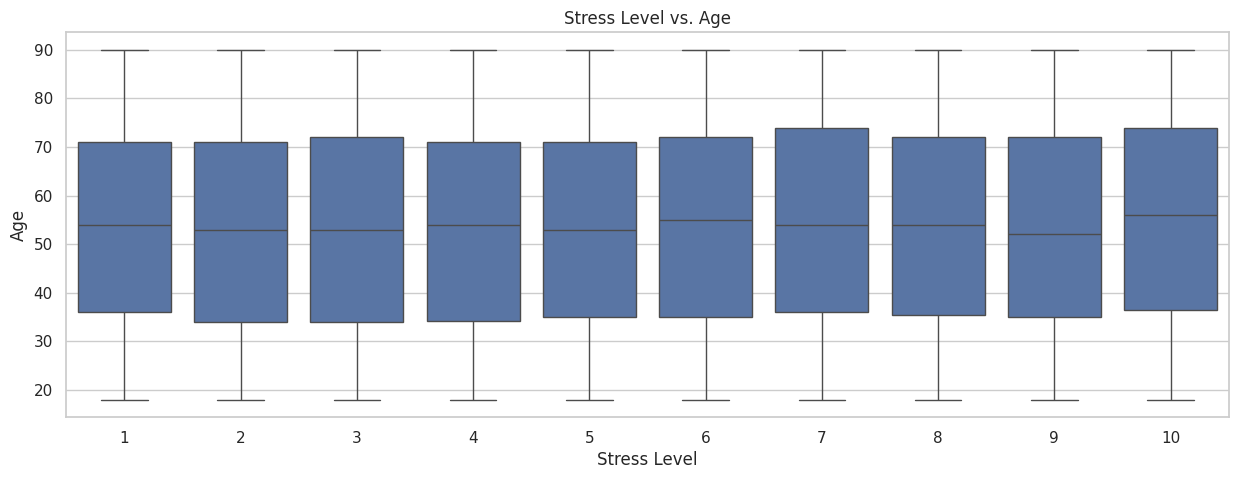

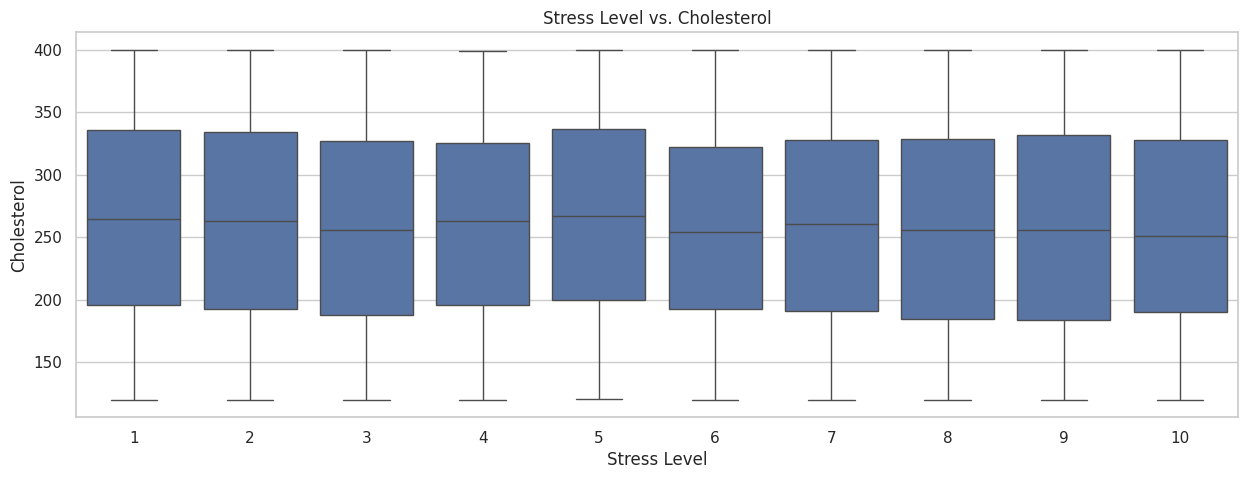

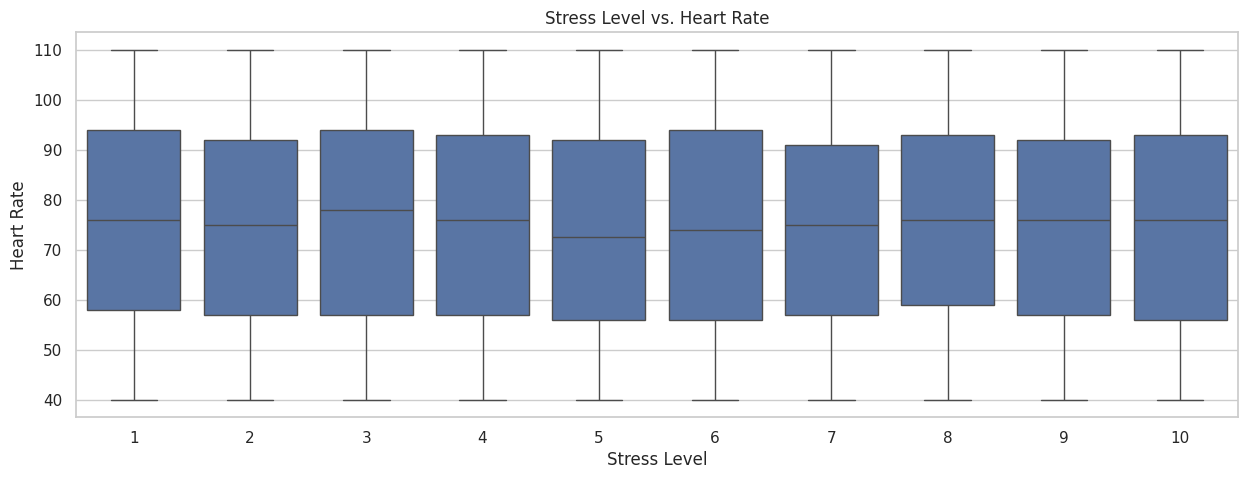

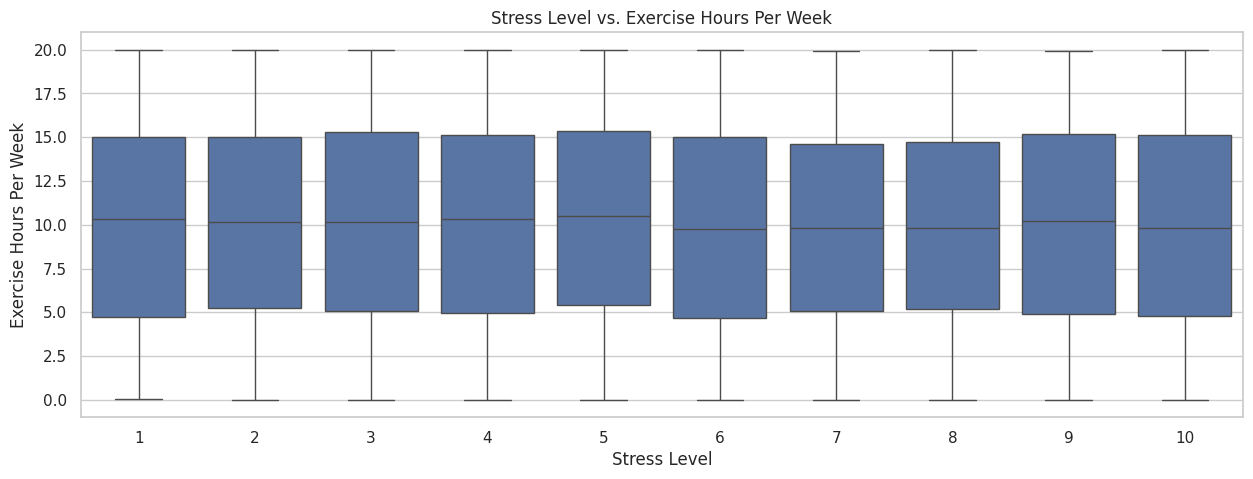

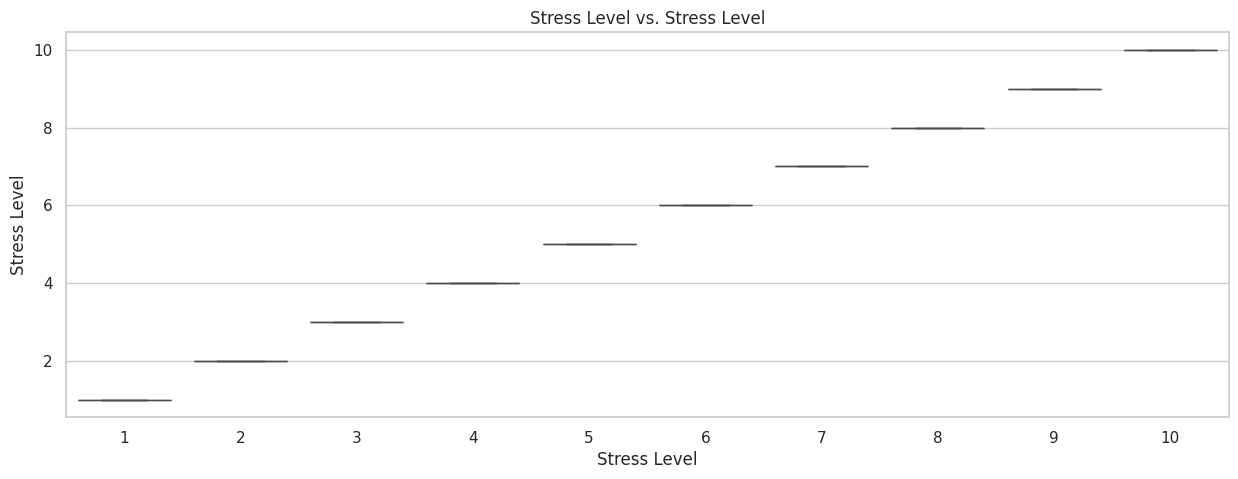

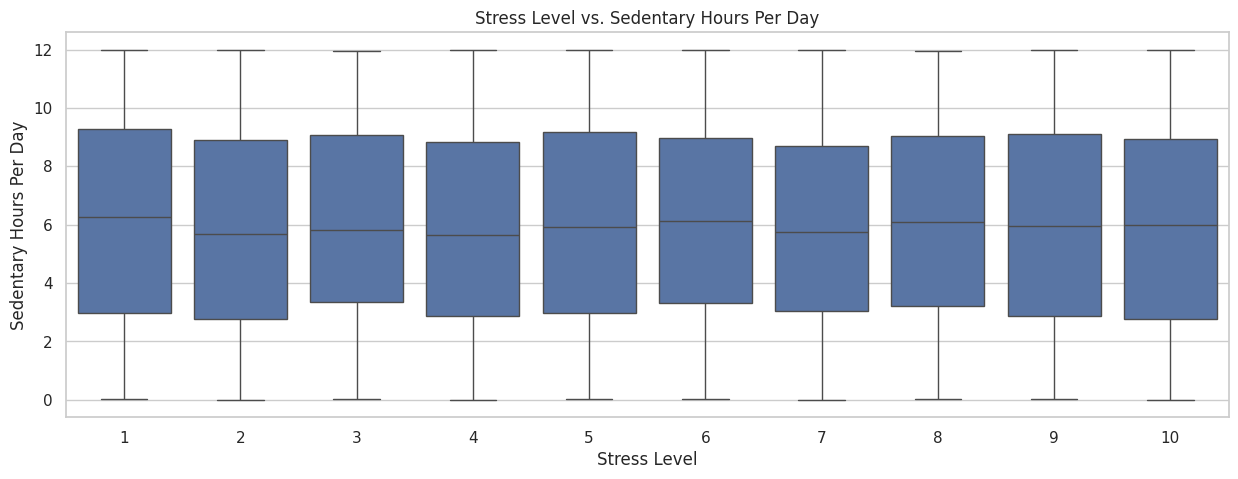

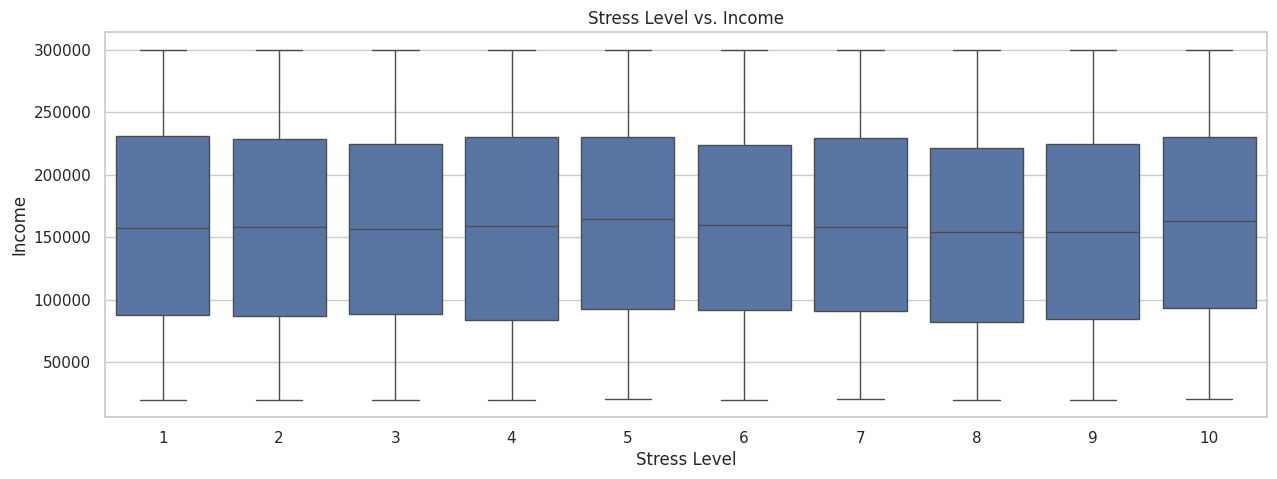

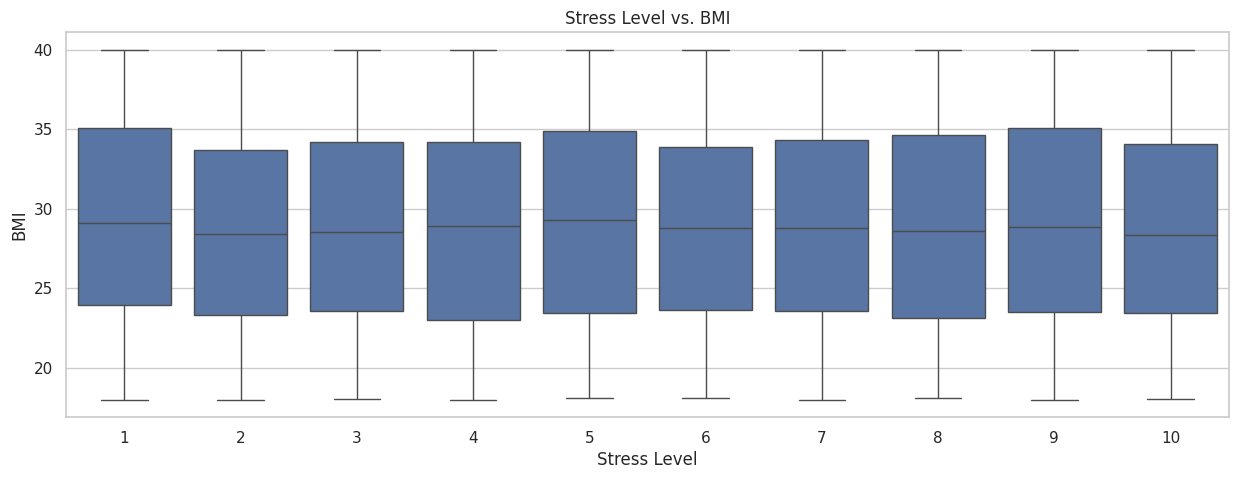

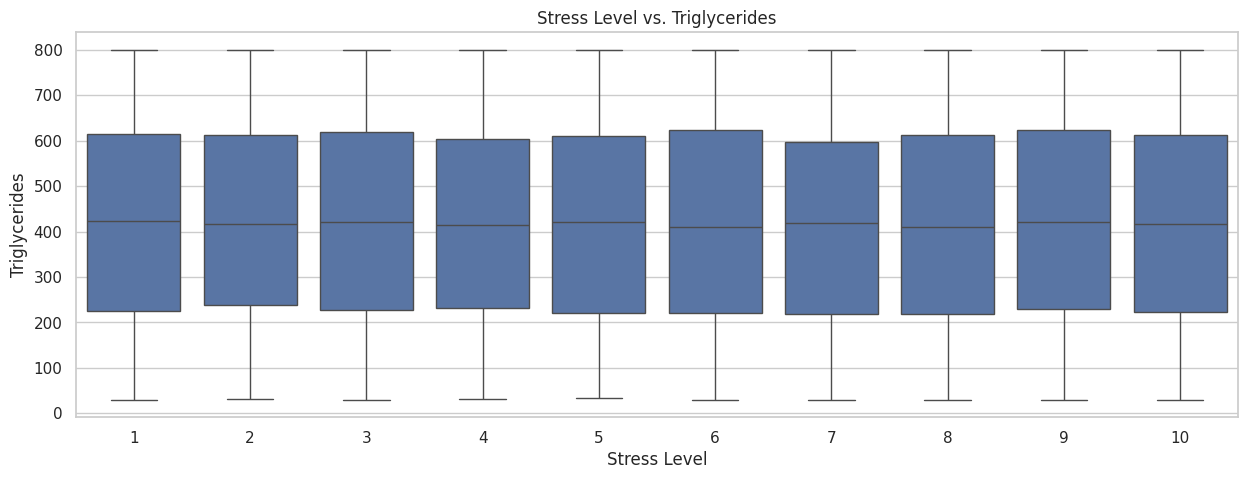

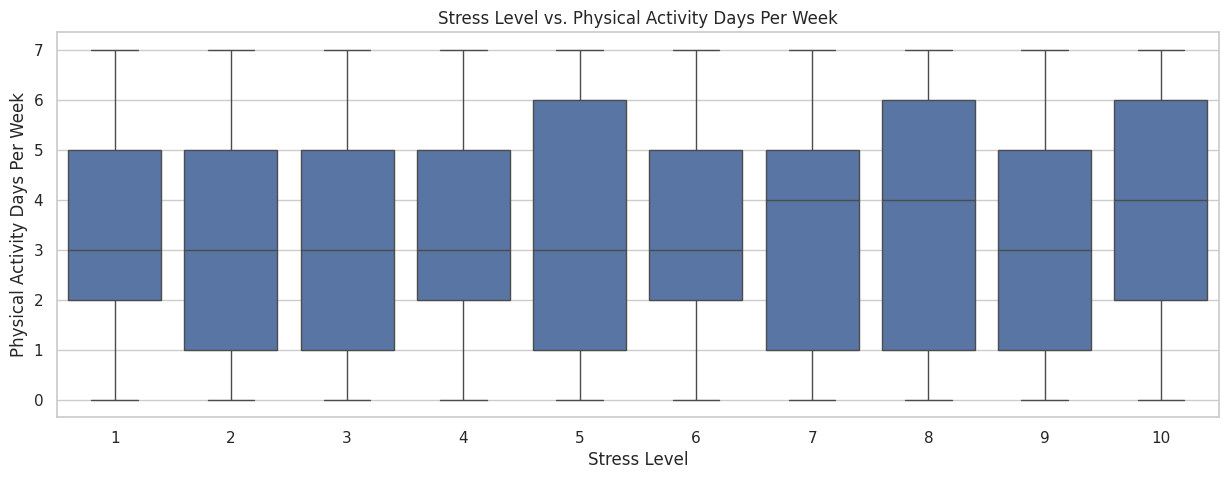

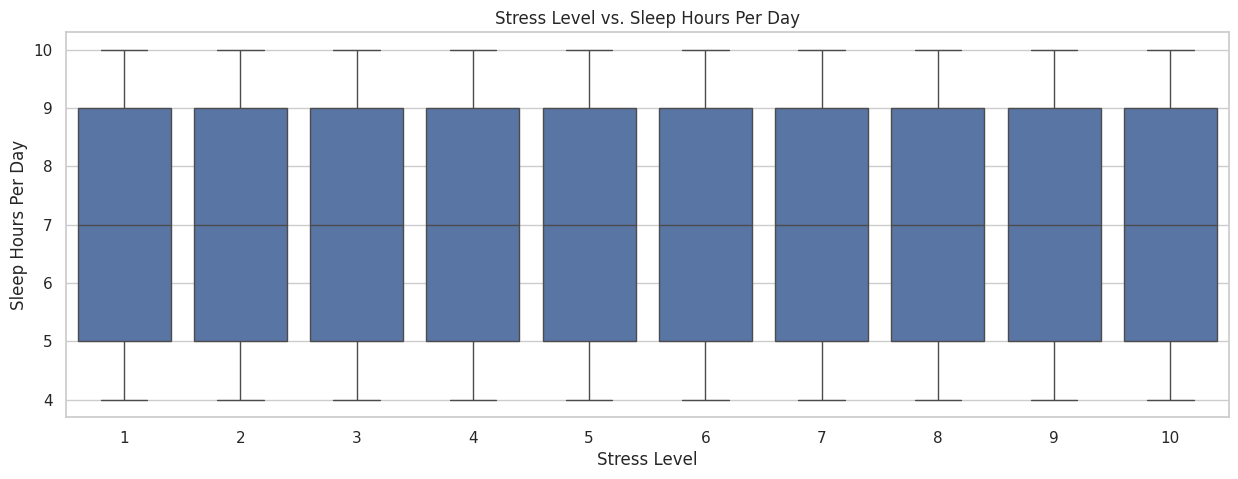

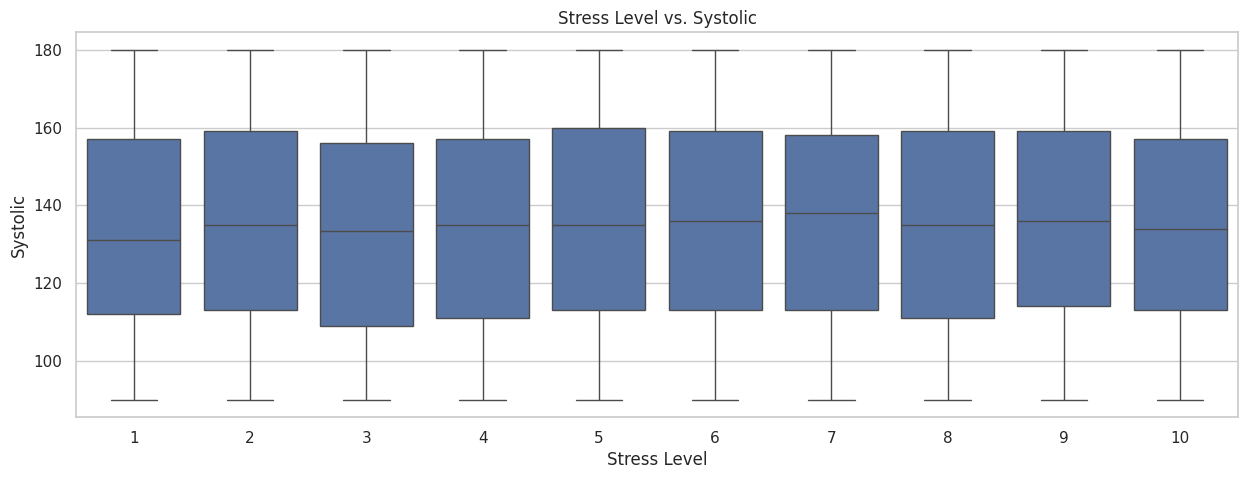

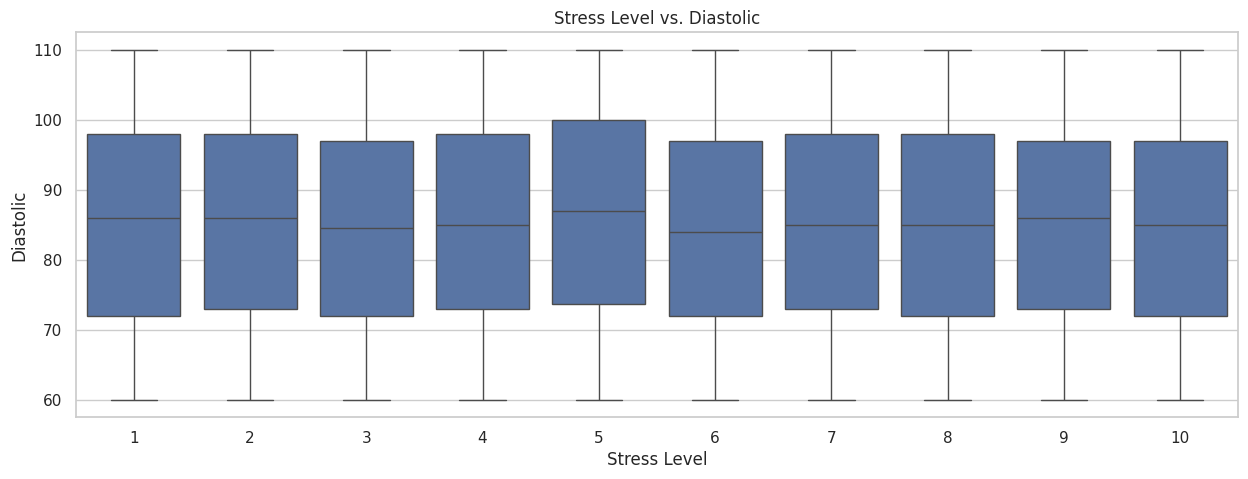

In [241]:
for feature in numerical_features:
  fig = plt.figure(figsize=(15,5))
  sns.boxplot(x = 'Stress Level', y= feature, data=df)
  plt.ylabel(feature)
  plt.xlabel("Stress Level")
  plt.title("Stress Level vs. "+feature)
plt.show()

Overall,
1. Cholesterol
2. Family History
3. Obesity
4. Previous Heart Problems
5. Medication Use
6. Sleep Hours Per Day
7. Sex
8. Diet

affect the Stress Level variable